In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [133]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [134]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [135]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

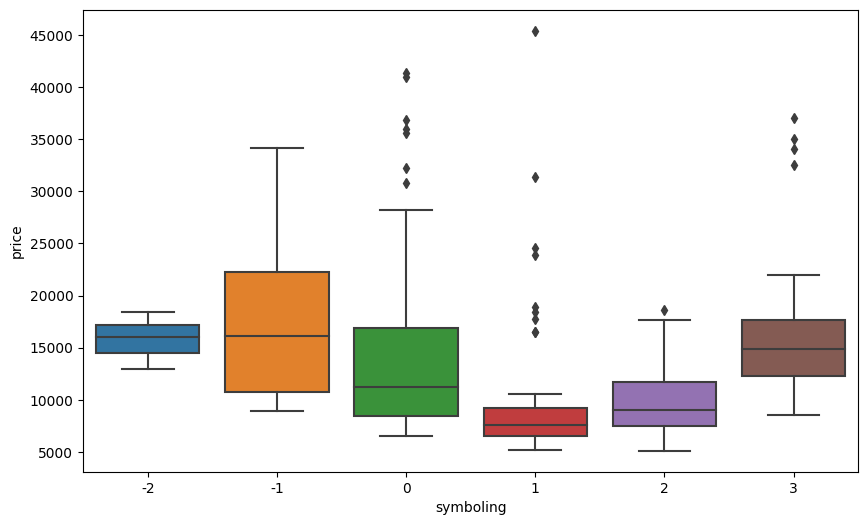

In [136]:
plt.figure(figsize=(10,6))
sns.boxplot(x='symboling',y='price',data=df)
plt.show()

In [138]:
train,test=train_test_split(df,test_size=0.25)

In [142]:
train_x=train[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
train_y=train[['price']]

test_x=test[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
test_y=test[['price']]

In [143]:
train_x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
134,3,99.1,186.6,66.5,56.1,2707,121,2.54,2.07,9.3,110,5250,21,28
71,-1,115.6,202.6,71.7,56.5,3740,234,3.46,3.10,8.3,155,4750,16,18
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
119,1,93.7,157.3,63.8,50.8,2128,98,3.03,3.39,7.6,102,5500,24,30
107,0,107.9,186.7,68.4,56.7,3020,120,3.46,3.19,8.4,97,5000,19,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,4800,26,32
88,-1,96.3,172.4,65.4,51.6,2403,110,3.17,3.46,7.5,116,5500,23,30
164,1,94.5,168.7,64.0,52.6,2204,98,3.19,3.03,9.0,70,4800,29,34
185,2,97.3,171.7,65.5,55.7,2212,109,3.19,3.40,9.0,85,5250,27,34


In [144]:
train_y

,price
134,15040.0
71,34184.0
0,13495.0
119,7957.0
107,11900.0
...,...
61,10595.0
88,9279.0
164,8238.0
185,8195.0


In [145]:
model=DecisionTreeRegressor()
model.fit(train_x,train_y)

DecisionTreeRegressor()

In [146]:
predct=model.predict(test_x)

In [147]:
metrics.r2_score(predct,test_y)

0.8729819090159111

<Axes: xlabel='price'>

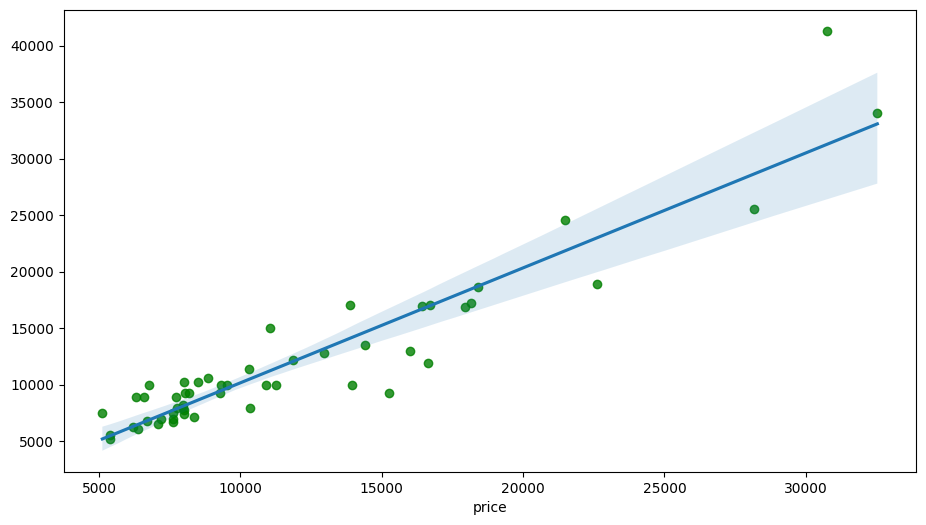

In [148]:
plt.figure(figsize=(11,6))
sns.regplot(x=test_y,y=predct,scatter_kws={'color':'green'})

In [149]:
test=np.array([[0,90.15,121.48,74.51,50.1,3100,170,3.5,3.2,9,150,5600,35,45]])
price=model.predict(test)
print(price)

[13499.]


C:\Users\aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
